# Data preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
source_texts = pd.read_csv('/content/drive/MyDrive/сlassifier/All_classes.csv', sep='\t')

In [ ]:
#source_texts.columns.values[0] = "feedback"

In [ ]:
source_texts.rename(columns={'Unnamed: 2':'Key_words', ",feedback": "texts"}, inplace=True)

In [ ]:
source_texts.rename(columns={'Unnamed: 1':'Classes'}, inplace=True)

In [ ]:
source_texts["Classes"] = list(map(lambda x: x.strip(), source_texts["Classes"]))

NameError: ignored

In [ ]:
source_texts.head(800)

,texts,Classes,Key_words
0,"0,""Хочу войти в личный кабинет,не получается в...",Сайт,"Логин, пароль, личный кабинет"
1,"1,""Закройте ,Ашан !!!!!!!! Срочно! Автобусы до...",Предложение благоустройство,"Закройте, автобусы"
2,"2,""Уважаемый Сергей Семёнович! Прошу срочно ра...",Предложение медицина,"Палаты, короновирус, здравоохранение"
3,"3,Sherzod sadullayev",Спам,NaN
4,"4,""Согласно инструкции был сгенерирован логин ...",Сайт,"Логин, пароль"
...,...,...,...
720,"""Добрый день. Большинство сайтов, содержащих в...",Предложение сайт,Крайне необходима
721,"""Здравствуйте. Хотелось бы чтобы мое обращение...",Предложение сайт,"Добавили,не сидели,не пачкали,не мешали"
722,Справа от входа в поликлинику № 61 ул Чертанов...,Предложение транспорт,"Узкий тротуар,не увернуться,отделите"
723,"""Есть идея! Необходимо над железнодорожными пу...",Предложение благоустройство,"Идея,построить"


##Data explorative analysis

In [ ]:
source_texts.describe()

,texts,Classes,Key_words
count,725,725,596
unique,657,13,472
top,"""Итак значит я предлагаю переименовать следующ...",Предложение сайт,"карта тройка, такси"
freq,6,147,11


In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(source_texts['Classes'])

LabelEncoder()

In [ ]:
source_texts['Classes'] = le.transform(source_texts['Classes'])

In [ ]:
source_texts['Classes'].value_counts()

4     147
9     128
7     127
2      68
6      50
12     44
3      34
5      33
1      33
11     24
0      16
8      11
10     10
Name: Classes, dtype: int64

In [ ]:
source_texts.to_csv("/content/drive/MyDrive/сlassifier/newest_data.csv", index = False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(1228)
from sklearn.feature_extraction.text import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
import re
from pymystem3 import Mystem
import numpy as np
import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
def stemming(text, stemmer = RussianStemmer()):
    try:
        return " ".join([stemmer.stem(w) for w in text.split()])
    except:
        return " "

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
 
source_texts['texts'] = source_texts['texts'].apply(lambda x: ' '.join(x))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(source_texts['texts'], source_texts['Classes'], test_size = 0.15)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


clf = Pipeline([
                ('vect', CountVectorizer(analyzer = 'char', ngram_range={4,6})),
                ('clf', LogisticRegression(solver='liblinear')),
])

clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range={4, 6}, preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                          

In [ ]:
true = y_test
predictions = clf.predict(X_test)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:   0.46
Recall:   0.37
F1-measure:   0.39
Accuracy:   0.46
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.57      0.73         7
           2       0.10      0.25      0.14         4
           3       0.50      0.33      0.40         6
           4       0.39      0.63      0.48        19
           5       0.80      0.50      0.62         8
           6       0.44      0.40      0.42        10
           7       0.44      0.47      0.46        17
           8       1.00      0.33      0.50         3
           9       0.56      0.77      0.65        13
          10       0.00      0.00      0.00         4
          11       0.80      0.57      0.67         7
          12       0.00      0.00      0.00         9

    accuracy                           0.46       109
   macro avg       0.46      0.37      0.39       109
weighted avg       0.48      0.46      0.45       109



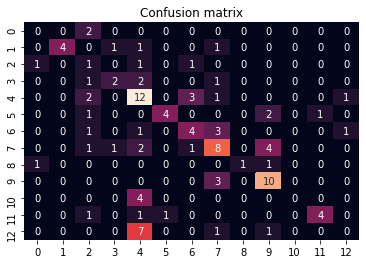

In [ ]:
print("Precision: {0:6.2f}".format(precision_score(true, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(true, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(true, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(true, predictions)))
print(classification_report(true, predictions))
labels = clf.classes_



labels = clf.classes_
sns.heatmap(data=confusion_matrix(true, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [ ]:
source_texts[]

In [ ]:
test_mass = list(source_texts[source_texts['Classes']=='Предложение законодательство']['texts'])

In [ ]:
for i in test_mass:
  print(i)

In [ ]:
source_texts.head()

In [ ]:
source_texts.head()

In [ ]:
source_texts['Unnamed: 1']

In [ ]:
unique_themes = source_texts['Unnamed: 1'].value_counts()

In [ ]:
pd.DataFrame.value_counts?

##Data cleaning

## Выполняем отсюда

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
source_texts = pd.read_csv('/content/drive/MyDrive/сlassifier/newest_data.csv', sep=',')

In [ ]:
source_texts.head()

NameError: ignored

In [ ]:
for i in range(len(source_texts['texts'])):
        source_texts['texts'][i] = source_texts['texts'][i].replace('.'," ")
        if "mos ru" in source_texts['texts'][i]:
           source_texts['texts'][i] = source_texts['texts'][i].replace("mos ru", "мосру")

In [ ]:
import re
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[А-Яа-я0-9]+)|([^0-9А-Яа-я \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df
data_clean = clean_text(source_texts, 'texts', 'text_clean')
data_clean.head()

,texts,Classes,Key_words,text_clean
0,"0,""Хочу войти в личный кабинет,не получается в...",Сайт,"Логин, пароль, личный кабинет",хочу войти в личный кабинетне получается восст...
1,"1,""Закройте ,Ашан !!!!!!!! Срочно! Автобусы до...",Предложение благоустройство,"Закройте, автобусы",закройте ашан срочно автобусы до ашана прек...
2,"2,""Уважаемый Сергей Семёнович! Прошу срочно ра...",Предложение медицина,"Палаты, короновирус, здравоохранение",уважаемый сергей семнович прошу срочно рассмот...
3,"3,Sherzod sadullayev",Спам,NaN,
4,"4,""Согласно инструкции был сгенерирован логин ...",Сайт,"Логин, пароль",согласно инструкции был сгенерирован логин и ...


##Dataset extension

###Markov chain

In [ ]:
!pip install gspread

In [ ]:
import csv

AttributeError: ignored

In [ ]:
!pip install pymarkovchain

  Created wheel for pymarkovchain: filename=PyMarkovChain-1.8-cp37-none-any.whl size=4334 sha256=f5a44740fd7c9abd46be7dedd5ffbf1d7ae5079826b8a700c25f67417d1307af
  Stored in directory: /root/.cache/pip/wheels/02/c2/05/edab4d5b8c9bf0bd202296ef44c0694e28d4e0a62f123ebad7
Successfully built pymarkovchain


In [ ]:
from pymarkovchain import MarkovChain

In [ ]:
test_texts = ".".join(list(data_clean[data_clean['Classes']=='Благоустройство']['text_clean']))

In [ ]:
mc = MarkovChain("./markov")

In [ ]:
mc.generateDatabase(test_texts)

In [ ]:
mc.generateString()

'хочу спроситьпо какому генплану надо строить торговый центр на ступеньках подьезда дома по ул марш савицкогоили кроме торговли уже властям ничего не надо в этом районе много семей с детьми близлежащие дома задыхаются от ядовитого зловонного смога прошу вас повлиять на немедленно е закрытие или перенос данного объекта к чему в центре нового современного парка стоит отравляющий жизнь москвичей коллектор'

In [ ]:
for i in range(20):
  print(mc.generateString())
  print("-----------------\n")

проживаем на ул рабочая троицк москва по всей стране для пенсионеров администрация предоставила возможность покупать медицинские маски по льготной цене а именно по рублей конкретно в подмосковье а москва для своих малоимущих граждан не хочет сделать так же имеет технологически нарушения отваливаются перила что делает ее эксплуатацию небезопасной просим провести замену конструкций и установить во дворе современные игровые зоны которые уже смонтированы во дворах жилых многоэтажек
-----------------

добрый день я проживаю вместе с супругой сыном невесткой и двумя внуками в трехкомнатной квартире по адресу варшавское шоссе дом корп й подъезд в доме значительного количество различных технических нежилых помещений которые заняты в том числе коммерческими структурами прошу вас повлиять на немедленно е закрытие или перенос данного объекта к чему в центре нового современного парка стоит отравляющий жизнь москвичей коллектор
-----------------

добрый день по адресу варшавское шоссе дом корп й по

In [ ]:
mc.generateStringWithSeed('карту')

'карту тройку а если заблокировали а потерял собянин на такси дать'